# UK Government Coronavirus Data API

The UK government have provided an API that can be used to pull UK data on coronavirus cases.

[Details](https://coronavirus.data.gov.uk/details/developers-guide)

## Notes on using the API

### Filters

Filters are required and use the format:

```sh
filters=[metricName1]=[string];[metricName2]=[string];[metricName3]=[string]
```

Authorised filter metrics:

- `areaType` - Area type as string
- `areaName` - Area name as string
- `areaCode` - Area Code as string
- `date` - Date as string [YYYY-MM-DD]

Valid values for `areaType` (Please note that the values of the areaType metric are case-sensitive):

- `overview` - Overview data for the United Kingdom
- `nation` - Nation data (England, Northern Ireland, Scotland, and Wales)
- `region` - Region data
- `nhsRegion` - NHS Region data
- `utla` - Upper-tier local authority data
- `ltla` - Lower-tier local authority data

### Structure parameter

```sh
structure={[responseName]:[metricName], [responseName]:[metricName]}
```

The structure parameter defines:

- The metrics that you wish to receive in the response
- The structure in which you wish to receive the response

#### Metrics

- `areaType` - Area type as string
- `areaName` - Area name as string
- `areaCode` - Area Code as string
- `date` - Date as string [YYYY-MM-DD]
- `hash` - Unique ID as string
- `newCasesByPublishDate` - New cases by publish date
- `cumCasesByPublishDate` - Cumulative cases by publish date
- `cumCasesBySpecimenDateRate` - Rate of cumulative cases by publish date per 100k resident population
- `newCasesBySpecimenDate` - New cases by specimen date
- `cumCasesBySpecimenDateRate` - Rate of cumulative cases by specimen date per 100k resident population
- `cumCasesBySpecimenDate` - Cumulative cases by specimen date
- `maleCases` - Male cases (by age)
- `femaleCases` - Female cases (by age)
- `newPillarOneTestsByPublishDate` - New pillar one tests by publish date
- `cumPillarOneTestsByPublishDate` - Cumulative pillar one tests by publish date
- `newPillarTwoTestsByPublishDate` - New pillar two tests by publish date
- `cumPillarTwoTestsByPublishDate` - Cumulative pillar two tests by publish date
- `newPillarThreeTestsByPublishDate` - New pillar three tests by publish date
- `cumPillarThreeTestsByPublishDate` - Cumulative pillar three tests by publish date
- `newPillarFourTestsByPublishDate` - New pillar four tests by publish date
- `cumPillarFourTestsByPublishDate` - Cumulative pillar four tests by publish date
- `newAdmissions` - New admissions
- `cumAdmissions` - Cumulative number of admissions
- `cumAdmissionsByAge` - Cumulative admissions by age
- `cumTestsByPublishDate` - Cumulative tests by publish date
- `newTestsByPublishDate` - New tests by publish date
- `covidOccupiedMVBeds` - COVID-19 occupied beds with mechanical ventilators
- `hospitalCases` - Hospital cases
- `plannedCapacityByPublishDate` - Planned capacity by publish date
- `newDeaths28DaysByPublishDate` - Deaths within 28 days of positive test
- `cumDeaths28DaysByPublishDate` - Cumulative deaths within 28 days of positive test
- `cumDeaths28DaysByPublishDateRate` - Rate of cumulative deaths within 28 days of positive test per 100k resident population
- `newDeaths28DaysByDeathDate` - Deaths within 28 days of positive test by death date
- `cumDeaths28DaysByDeathDate` - Cumulative deaths within 28 days of positive test by death date
- `cumDeaths28DaysByDeathDateRate` - Rate of cumulative deaths within 28 days of positive test by death date per 100k resident population

### URL encoding
Warning: It may be necessary to encode the URL to ensure that the data are correctly transmitted and parsed. Modern browsers encode the URL automatically before transmission.

### Formats

We can specify a format with a choice between JSON, XML and CSV.

```sh
format=[format]
```

# Examples

In [24]:
from requests import get

def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"date":"date","newCases":"newCasesByPublishDate"}'
    )
    
    data = get_data(endpoint)
#     print(data)

We can also create the API components separately and then encode hem to make it easier to read.

In [69]:
from urllib.parse import urlencode
from json import dumps

AREA_TYPE = "nation"
AREA_NAME = "england"

filters = [
    f"areaType={ AREA_TYPE }",
    f"areaName={ AREA_NAME }"
]

structure = {
    "date": "date",
    "name": "areaName",
    "code": "areaCode",
    "cases": {
        "daily": "newCasesByPublishDate",
        "cumulative": "cumCasesByPublishDate"
    },
    "deaths": {
        "daily": "newDeathsByDeathDate",
        "cumulative": "cumDeathsByDeathDate"
    }
}

api_params = {
    "filters": str.join(";", filters),
    "structure": dumps(structure, separators=(",", ":"))
}

encoded_params = urlencode(api_params)
print(f"/v1/data?{ encoded_params }")

endpoint = ('https://api.coronavirus.data.gov.uk/v1/data?'+encoded_params)
data = get_data(endpoint)

/v1/data?filters=areaType%3Dnation%3BareaName%3Dengland&structure=%7B%22date%22%3A%22date%22%2C%22name%22%3A%22areaName%22%2C%22code%22%3A%22areaCode%22%2C%22cases%22%3A%7B%22daily%22%3A%22newCasesByPublishDate%22%2C%22cumulative%22%3A%22cumCasesByPublishDate%22%7D%2C%22deaths%22%3A%7B%22daily%22%3A%22newDeathsByDeathDate%22%2C%22cumulative%22%3A%22cumDeathsByDeathDate%22%7D%7D


# Daily cases and deaths for the UK as a whole

In [95]:
from urllib.parse import urlencode
from json import dumps

AREA_TYPE = "overview"

filters = [
    f"areaType={ AREA_TYPE }",
]

structure = {
    "date": "date",
    "newCases": "newCasesByPublishDate",
    "cumCases": "cumCasesByPublishDate",
    "newDeaths": "newDeaths28DaysByPublishDate",
    "cumDeaths": "cumDeaths28DaysByPublishDate",
}

api_params = {
    "filters": str.join(";", filters),
    "structure": dumps(structure, separators=(",", ":"))
}

encoded_params = urlencode(api_params)

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'+encoded_params
    )
    
    data = get_data(endpoint)

df = pd.DataFrame(data['data'])
df

,date,newCases,cumCases,newDeaths,cumDeaths
0,2021-01-04,58784,2713563.0,407,75431.0
1,2021-01-03,54990,2654779.0,454,75024.0
2,2021-01-02,57725,2599789.0,445,74570.0
3,2021-01-01,53285,2542065.0,613,74125.0
4,2020-12-31,55892,2488780.0,964,73512.0
...,...,...,...,...,...
363,2020-01-07,0,NaN,0,NaN
364,2020-01-06,0,NaN,0,NaN
365,2020-01-05,0,NaN,0,NaN
366,2020-01-04,0,NaN,0,NaN


## Create a 7-day rolling average

In [98]:
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(by='date')
df['7dayCases'] = df.newCases.rolling(window=7).mean()
df['7dayDeaths'] = df.newDeaths.rolling(window=7).mean()
df.tail(10)

,date,newCases,cumCases,newDeaths,cumDeaths,7dayCases,7dayDeaths
9,2020-12-26,35691,2257844.0,230,70479.0,36232.285714,486.285714
8,2020-12-27,30501,2288345.0,317,70796.0,35457.000000,485.000000
7,2020-12-28,41385,2329730.0,357,71153.0,36602.857143,505.285714
6,2020-12-29,53135,2382865.0,414,71567.0,38935.857143,465.714286
5,2020-12-30,50023,2432888.0,981,72548.0,40476.714286,499.571429
4,2020-12-31,55892,2488780.0,964,73512.0,42764.571429,553.714286
3,2021-01-01,53285,2542065.0,613,74125.0,45701.714286,553.714286
2,2021-01-02,57725,2599789.0,445,74570.0,48849.428571,584.428571
1,2021-01-03,54990,2654779.0,454,75024.0,52347.857143,604.000000
0,2021-01-04,58784,2713563.0,407,75431.0,54833.428571,611.142857


# Plotly plots 

In [118]:
import plotly.graph_objects as go
import plotly.express as px

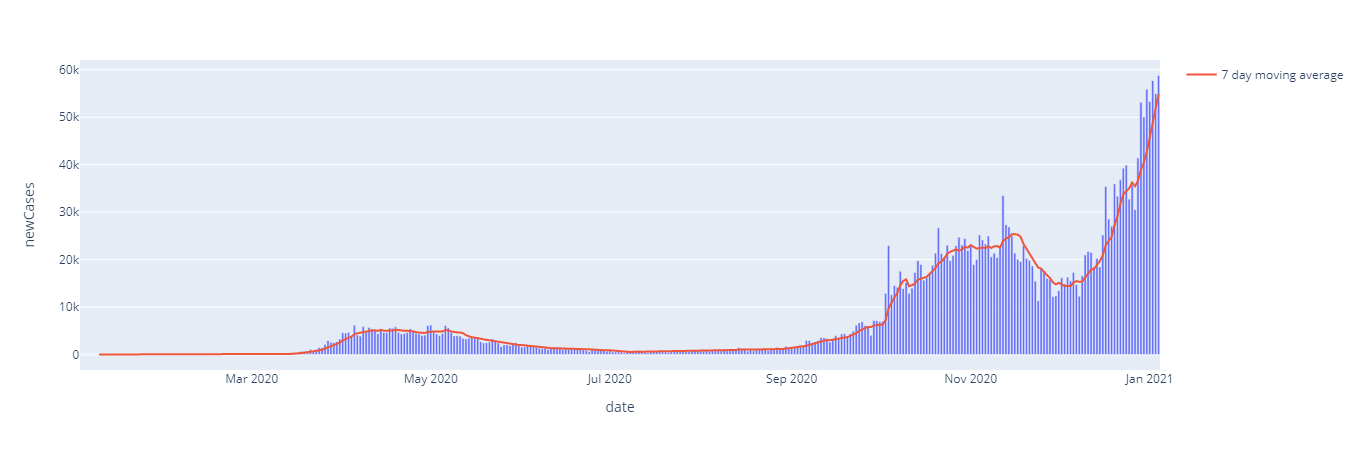

In [136]:
fig = px.bar(
    df,
    x = 'date',
    y = 'newCases'
)

fig.add_trace(
    go.Scatter(
        x = df.date,
        y = df['7dayCases'],
        mode = 'lines',
        name = '7 day moving average'
    )
)

fig.show()

In [119]:
fig = go.Figure()

fig.add_trace(
    go.bar(
        x = df.date,
        y = df.cumCases
))

fig.show()

TypeError: 'module' object is not callable